In [1]:
!pip install tensorflow

You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [3]:
!pip install skflow

  Running setup.py bdist_wheel for skflow: started
  Running setup.py bdist_wheel for skflow: finished with status 'done'
  Stored in directory: C:\Users\Priyanka\AppData\Local\pip\Cache\wheels\5b\2d\04\d530e678229357d99cba5bceb7f2df21388072c128fc3e1236
  Running setup.py bdist_wheel for sklearn: started
  Running setup.py bdist_wheel for sklearn: finished with status 'done'
  Stored in directory: C:\Users\Priyanka\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built skflow sklearn


You are using pip version 9.0.3, however version 18.0 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [4]:
# Use the Azure Machine Learning data source package
from azureml.dataprep import datasource

import matplotlib.pyplot as plt
%matplotlib inline
import random
import numpy as np
import pandas as pd
from sklearn import datasets, svm, cross_validation, tree, preprocessing, metrics
import sklearn.ensemble as ske
import tensorflow as tf
import skflow

In [5]:
titanic_df = datasource.load_datasource('train.dsource')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1.0,0.0,3.0,"Braund, Mr. Owen Harris",male,22.0,1.0,0.0,A/5 21171,7.2500,,S
1,2.0,1.0,1.0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1.0,0.0,PC 17599,71.2833,C85,C
2,3.0,1.0,3.0,"Heikkinen, Miss. Laina",female,26.0,0.0,0.0,STON/O2. 3101282,7.9250,,S
3,4.0,1.0,1.0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1.0,0.0,113803,53.1000,C123,S
4,5.0,0.0,3.0,"Allen, Mr. William Henry",male,35.0,0.0,0.0,373450,8.0500,,S


The column heading variables have the following meanings:

    survival: Survival (0 = no; 1 = yes)
    class: Passenger class (1 = first; 2 = second; 3 = third)
    name: Name
    sex: Sex
    age: Age
    sibsp: Number of siblings/spouses aboard
    parch: Number of parents/children aboard
    ticket: Ticket number
    fare: Passenger fare
    cabin: Cabin
    embarked: Port of embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)
    boat: Lifeboat (if survived)
    body: Body number (if did not survive and body was recovered)

Now that we have the data in a dataframe, we can begin an advanced analysis of the data using powerful single-line Pandas functions. First, let’s examine the overall chance of survival for a Titanic passenger.

In [7]:
titanic_df['Survived'].mean()

0.3838383838383838

The calculation shows that only 38% of the passengers survived. Not the best odds. The reason for this massive loss of life is that the Titanic was only carrying 20 lifeboats, which was not nearly enough for the 1,317 passengers and 885 crew members aboard. It seems unlikely that all of the passengers would have had equal chances at survival, so we will continue breaking down the data to examine the social dynamics that determined who got a place on a lifeboat and who did not.

Social classes were heavily stratified in the early twentieth century. This was especially true on the Titanic, where the luxurious first-class areas were completely off limits to the middle-class passengers in second class, and especially to those who carried a third class “economy price” ticket. To get a view into the composition of each class, we can group data by class, and view the averages for each column:

In [8]:
titanic_df.groupby('Pclass').mean()

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1.0,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2.0,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3.0,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


We can start drawing some interesting insights from this data. For instance, passengers in first class had a 62% chance of survival, compared to a 25.5% chance for those in 3rd class. Additionally, the lower classes generally consisted of younger people, and the ticket prices for first class were predictably much higher than those for second and third class. The average ticket price for first class (£87.5) is equivalent to $13,487 in 2016.

We can extend our statistical breakdown using the grouping function for both class and sex:

In [10]:
class_sex_grouping = titanic_df.groupby(['Pclass','Sex']).mean()
class_sex_grouping

PassengerId  Survived        Age     SibSp     Parch  \
Pclass Sex                                                            
1.0    female   469.212766  0.968085  34.611765  0.553191  0.457447   
       male     455.729508  0.368852  41.281386  0.311475  0.278689   
2.0    female   443.105263  0.921053  28.722973  0.486842  0.605263   
       male     447.962963  0.157407  30.740707  0.342593  0.222222   
3.0    female   399.729167  0.500000  21.750000  0.895833  0.798611   
       male     455.515850  0.135447  26.507589  0.498559  0.224784   

                     Fare  
Pclass Sex                 
1.0    female  106.125798  
       male     67.226127  
2.0    female   21.970121  
       male     19.741782  
3.0    female   16.118810  
       male     12.661633

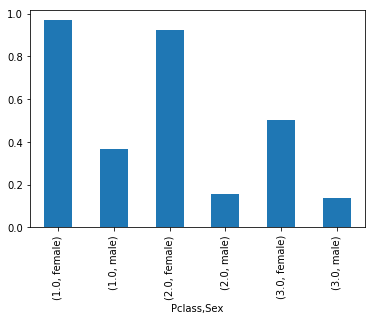

In [11]:
class_sex_grouping['Survived'].plot.bar()

While the Titanic was sinking, the officers famously prioritized who was allowed in a lifeboat with the strict maritime tradition of evacuating women and children first. Our statistical results clearly reflect the first part of this policy as, across all classes, women were much more likely to survive than the men. We can also see that the women were younger than the men on average, were more likely to be traveling with family, and paid slightly more for their tickets.

The effectiveness of the second part of this “Women and children first” policy can be deduced by breaking down the survival rate by age.

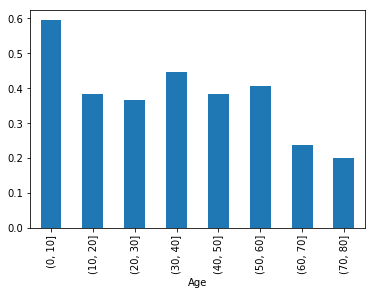

In [13]:
group_by_age = pd.cut(titanic_df["Age"], np.arange(0, 90, 10))
age_grouping = titanic_df.groupby(group_by_age).mean()
age_grouping['Survived'].plot.bar()

Here we can see that children were indeed the most likely age group to survive, although this percentage was still tragically below 60%.

If we perform a count of each column, we will see that much of the data on certain fields is missing. Most machine learning algorithms will have a difficult time handling missing values, so we will need to make sure that each row has a value for each column.

In [14]:
titanic_df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          891
Embarked       891
dtype: int64

In [16]:
titanic_df = titanic_df.dropna()

In [17]:
titanic_df.count() 
#Probably requires the age to be filled in using the previous notebook

PassengerId    714
Survived       714
Pclass         714
Name           714
Sex            714
Age            714
SibSp          714
Parch          714
Ticket         714
Fare           714
Cabin          714
Embarked       714
dtype: int64

Now we need to format the remaining data in a way that our machine learning algorithms will accept. 

In [35]:
def preprocess_titanic_df(df):
    processed_df = df.copy()
    le = preprocessing.LabelEncoder()
    processed_df.Sex = le.fit_transform(processed_df.Sex)
    processed_df.Embarked = le.fit_transform(processed_df.Embarked)
    processed_df = processed_df.drop(['Name','Ticket','Cabin'],axis=1)
    return processed_df

In [36]:
processed_df = preprocess_titanic_df(titanic_df)

In [37]:
processed_df.dtypes

PassengerId    float64
Survived       float64
Pclass         float64
Sex              int64
Age            float64
SibSp          float64
Parch          float64
Fare           float64
Embarked         int64
dtype: object

The “sex” and “embarked” fields are both string values that correspond to categories (i.e “Male” and “Female”) so we will run each through a preprocessor. This preprocessor will convert these strings into integer keys, making it easier for the classification algorithms to find patterns. For instance, “Female” and “Male” will be converted to 0 and 1 respectively. The “name”, “ticket”, "Cabin" columns consist of non-categorical string values. These are difficult to use in a classification algorithm, so we will drop them from the data set.

In [38]:
X = processed_df.drop(['Survived'], axis=1).values
y = processed_df['Survived'].values

In [39]:
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X,y,test_size=0.2)

Next, we separate the data set into two arrays: “X” containing all of the values for each row besides “survived”, and “y” containing only the “survived” value for that row. The classification algorithms will compare the attribute values of “X” to the corresponding values of “y” to detect patterns in how different attributes values tend to affect the survival of a passenger.

Finally, we break the “X” and “y” array into two parts each — a training set and a testing set. We will feed the training set into the classification algorithm to form a trained model. Once the model is formed, we will use it to classify the testing set, allowing us to determine the accuracy of the model. Here we have have made a 20/80 split, such that 80% of the dataset will be used for training and 20% will be used for testing.

We will start off with a simple decision tree classifier. A decision tree examines one variable at a time, and splits into one of two branches based on the result of that value, at which point it does the same for the next variable. 

The tree first splits by sex, and then by class, since it has learned during the training phase that these are the two most important features for determining survival. The dark blue boxes indicate passengers who are likely to survive, and the dark orange boxes represent passengers who are almost certainly doomed. Interestingly, after splitting by class, the main deciding factor determining the survival of women is the ticket fare that they paid, while the deciding factor for men is their age (with children being much more likely to survive).

To create this tree, we first initialize an instance of an untrained decision tree classifier. (Here we will set the maximum depth of the tree to 10). Next we “fit” this classifier to our training set, enabling it to learn about how different factors affect the survivability of a passenger. Now that the decision tree is ready, we can “score” it using our test data to determine how accurate it is.

In [40]:
clf_dt = tree.DecisionTreeClassifier(max_depth=10)

In [41]:
clf_dt.fit (X_train, y_train)
clf_dt.score (X_test, y_test)

0.7202797202797203

The resulting reading, 0.7703, means that the model correctly predicted the survival of 77% of the test set. Not bad for our first model!

If you are being an attentive, skeptical reader (as you should be), you might be thinking that the accuracy of the model could vary depending on which rows were selected for the training and test sets. We will get around this problem by using a shuffle validator.  

In [42]:
shuffle_validator = cross_validation.ShuffleSplit(len(X), n_iter=20, test_size=0.2, random_state=0)
def test_classifier(clf):
    scores = cross_validation.cross_val_score(clf, X, y, cv=shuffle_validator)
    print("Accuracy: %0.4f (+/- %0.2f)" % (scores.mean(), scores.std()))

In [43]:
test_classifier(clf_dt)

Accuracy: 0.7636 (+/- 0.02)


This shuffle validator applies the same random 20:80 split as before, but this time it generates 20 unique permutations of this split. By passing this shuffle validator as a parameter to the “cross_val_score” function, we can score our classifier against each of the different splits, and compute the average accuracy and standard deviation from the results.

The result shows that our decision tree classifier has an overall accuracy of 77.34%, although it can go up to 80% and down to 75% depending on the training/test split. Using scikit-learn, we can easily test other machine learning algorithms using the exact same syntax. 

The “Random Forest” classification algorithm will create a multitude of (generally very poor) trees for the data set using different random subsets of the input variables, and will return whichever prediction was returned by the most trees. This helps to avoid “overfitting”, a problem that occurs when a model is so tightly fitted to arbitrary correlations in the training data that it performs poorly on test data.

In [44]:
clf_rf = ske.RandomForestClassifier(n_estimators=50)
test_classifier(clf_rf)

Accuracy: 0.8105 (+/- 0.02)


In [63]:
clf_rf.fit (X_train, y_train)
clf_rf.score (X_test, y_test)
prediction = clf_rf.predict(X_test)
passenger_set[passenger_set.Survived != prediction]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
23,24.0,1.0,1.0,"Sloper, Mr. William Thompson",male,28.0,0.0,0.0,113788,35.5000,A6,S
52,53.0,1.0,1.0,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49.0,1.0,0.0,PC 17572,76.7292,D33,C
97,98.0,1.0,1.0,"Greenfield, Mr. William Bertram",male,23.0,0.0,1.0,PC 17759,63.3583,D10 D12,C
21,22.0,1.0,2.0,"Beesley, Mr. Lawrence",male,34.0,0.0,0.0,248698,13.0000,D56,S
41,42.0,0.0,2.0,"Turpin, Mrs. William John Robert (Dorothy Ann ...",female,27.0,1.0,0.0,11668,21.0000,,S
14,15.0,0.0,3.0,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0.0,0.0,350406,7.8542,,S
18,19.0,0.0,3.0,"Vander Planke, Mrs. Julius (Emelia Maria Vande...",female,31.0,1.0,0.0,345763,18.0000,,S
25,26.0,1.0,3.0,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.0,1.0,5.0,347077,31.3875,,S
38,39.0,0.0,3.0,"Vander Planke, Miss. Augusta Maria",female,18.0,2.0,0.0,345764,18.0000,,S
39,40.0,1.0,3.0,"Nicola-Yarred, Miss. Jamila",female,14.0,1.0,0.0,2651,11.2417,,C


In [ ]:
***FIND OUT ABOUT THE PEOPLE***

The “Gradient Boosting” classifier will generate many weak, shallow prediction trees and will combine, or “boost”, them into a strong model. This model performs very well on our data set, but has the drawback of being relatively slow and difficult to optimize, as the model construction happens sequentially so it cannot be parallelized.

In [45]:
clf_gb = ske.GradientBoostingClassifier(n_estimators=50)
test_classifier(clf_gb)

Accuracy: 0.8143 (+/- 0.02)


A “Voting” classifier can be used to apply multiple conceptually divergent classification models to the same data set and will return the majority vote from all of the classifiers. For instance, if the gradient boosting classifier predicts that a passenger will not survive, but the decision tree and random forest classifiers predict that they will live, the voting classifier will chose the latter.

In [46]:
eclf = ske.VotingClassifier([('dt', clf_dt), ('rf', clf_rf), ('gb', clf_gb)])
test_classifier(eclf)

C:\Users\Priyanka\AppData\local\AmlWorkbench\Python\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Priyanka\AppData\local\AmlWorkbench\Python\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Priyanka\AppData\local\AmlWorkbench\Python\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\Priyanka\AppData\local\AmlWorkbench\Python\lib\site-packages\sklearn\preprocess

Accuracy: 0.8122 (+/- 0.03)


Computational Brains — An Introduction to Deep Neural Networks

Neural networks are a rapidly developing paradigm for information processing based loosely on how neurons in the brain processes information. A neural network consists of multiple layers of nodes, where each node performs a unit of computation and passes the result onto the next node. Multiple nodes can pass inputs to a single node and vice versa.

The neural network also contains a set of weights, which can be refined over time as the network learns from sample data. The weights are used to describe and refine the connection strengths between nodes. For instance, in our Titanic data set, node connections transmitting the passenger sex and class will likely be weighted very heavily, since these are important for determining the survival of a passenger.  

By Glosser.ca, CC BY-SA 3.0, source: https://commons.wikimedia.org/w/index.php?curid=24913461

A Deep Neural Network (DNN) is a neural network that works not just by passing data between nodes, but by passing data between layers of nodes. Each layer of nodes is able to aggregate and recombine the outputs from the previous layer, allowing the network to gradually piece together and make sense of unstructured data (such as an image). Such networks can also be heavily optimized due to their modular nature, allowing the operations of each node layer to be parallelized en masse across multiple CPUs and even GPUs.

We have barely begun to skim the surface of explaining neural networks. For a more in depth explanation of the inner workings of DNNs, this is a good resource: http://deeplearning4j.org/neuralnet-overview.html.

This awesome tool allows you to visualize and modify an active deep neural network: http://playground.tensorflow.org.

The major advantage of neural networks over traditional machine learning techniques is their ability to find patterns in unstructured data (such as images or natural language). Training a deep neural network on the Titanic data set is total overkill, but it’s a cool technology to work with, so we’re going to do it anyway.

An emerging powerhouse in programing neural networks is an open source library from Google called TensorFlow. This library is the foundation for many of the most recent advances in machine learning, such as being used to train computer programs to create unique works of music and visual art (https://magenta.tensorflow.org/welcome-to-magenta). The syntax for using TensorFlow is somewhat abstract, but there is a wrappercalled “skflow” in the TensorFlow package that allows us to build deep neural networks using the now-familiar scikit-learn syntax.

In [52]:
# Deep Neural Network
feature_columns = tensorflow.contrib.learn.infer_real_valued_columns_from_input(processed_df)
classifier = tensorflow.contrib.learn.DNNClassifier(hidden_units=[10, 20, 10], n_classes=3, feature_columns=feature_columns)
classifier.fit(X_train, y_train, steps=300, batch_size=32)
survived_predictions = list(classifier.predict(X, as_iterable=True))
score = metrics.accuracy_score(y, survived_predictions)
print('Accuracy: %f' % score)

Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please access pandas data directly.
Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please convert numpy dtypes explicitly.
Instructions for updating:
Please specify feature columns explicitly.
Instructions for updating:
Please switch to tf.contrib.estimator.*_head.
Instructions for updating:
Please replace uses of any Estimator from tf.contrib.learn with an Estimator from tf.estimator.*
Instructions for updating:
When switching to tf.estimator.Estimator, use tf.estimator.RunConfig instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_is_chief': True, '_tf_config': gpu_options {
  per_process_gpu_memory_fraction: 1.0
}
, '_log_step_count_steps': 100, '_save_checkpoints_secs': 600, '_evaluation_master': '', '_keep_checkpoint_every_n_hours': 10000,

ValueError: Labels dtype should be integer Instead got <dtype: 'float64'>.

In [54]:
def custom_model(X, y):
    layers = skflow.ops.dnn(X, [20, 40, 20], tf.tanh)
    return skflow.models.logistic_regression(layers, y)

Despite the increased power and lengthier runtime of these neural network models, you will notice that the accuracy is still about the same as what we achieved using more traditional tree-based methods. The main advantage of neural networks — unsupervised learning of unstructured data — doesn’t necessarily lend itself well to our Titanic dataset, so this is not too surprising.  

I still, however, think that running the passenger data of a 104-year-old shipwreck through a cutting-edge deep neural network is pretty cool.

Given that the accuracy for all of our models is maxing out around 80%, it will be interesting to look at specific passengers for whom these classification algorithms are incorrect.

In [57]:
passengers_set_1 = titanic_df[titanic_df.Pclass == 1].iloc[:20,:].copy()
passengers_set_2 = titanic_df[titanic_df.Pclass == 2].iloc[:20,:].copy()
passengers_set_3 = titanic_df[titanic_df.Pclass == 3].iloc[:20,:].copy()
passenger_set = pd.concat([passengers_set_1,passengers_set_2,passengers_set_3])
testing_set = preprocess_titanic_df(passenger_set)

In [58]:
training_set = pd.concat([titanic_df, passenger_set]).drop_duplicates(keep=False)
training_set = preprocess_titanic_df(training_set)

In [59]:
X_train = training_set.drop(['Survived'], axis=1).values
y_train = training_set['Survived'].values
X_test = testing_set.drop(['Survived'], axis=1).values
y_test = testing_set['Survived'].values